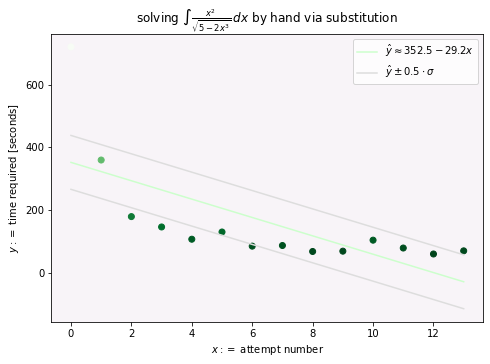

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

regression_degree = 1
std_factor = 0.5
precision = 1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

y = [720, 360, 180, 147, 108, 131, 86, 88, 69, 70, 105, 80, 61, 71]
X = list(np.arange(0, len(y)))

plt.scatter(X,y,c=y,cmap='Greens_r')

X_regression = np.linspace(0, len(y)-1, len(y)*10)
y_regression = np.poly1d(np.polyfit(X, y, regression_degree))

x = sym.symbols('x')
y_regression_equation = sym.printing.latex(sym.Poly([f'{coef:.{precision}f}' for coef in y_regression.coef],x).as_expr())

plt.plot(X_regression, y_regression(X_regression), '#ccffcc', label=rf'$\^{{y}} \approx {y_regression_equation}$')
plt.plot(X_regression, y_regression(X_regression)+np.std(y)*std_factor,'#ddd', label=rf'$\^{{y}} \pm {std_factor} \cdot \sigma $')
plt.plot(X_regression, y_regression(X_regression)-np.std(y)*std_factor, '#ddd')

ax.set_facecolor('#f8f4f8')
ax.legend()

ax.set_title(r'solving $\int \frac{x^2}{\sqrt{5-2x^3}} \,dx $ by hand via substitution')
plt.ylabel(r'$y := $ time required [seconds]')
plt.xlabel(r'$x := $ attempt number')

plt.show()

fig.savefig('repetition.png',bbox_inches='tight')